<a href="https://colab.research.google.com/github/Darkling-01/Airbnb-Machine-Learning/blob/main/Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This project is for Machine Learning CSE5160

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

from google.colab import files

print("SETUP COMPLETE...")

SETUP COMPLETE...


In [27]:
test = files.upload()

Saving airbnb_data.csv to airbnb_data.csv


In [37]:
dataset = pd.read_csv("airbnb_data.csv") 
dataset.shape

(74111, 29)

In [30]:
dataset.head()

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,...,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,...,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0
2,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,...,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0
3,13418779,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,...,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,NaN,https://a0.muscache.com/im/pictures/72208dad-9...,94117.0,2.0,2.0
4,3808709,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,...,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,NaN,20009,0.0,1.0


In [32]:
dataset.columns

Index(['id', 'log_price', 'property_type', 'room_type', 'amenities',
       'accommodates', 'bathrooms', 'bed_type', 'cancellation_policy',
       'cleaning_fee', 'city', 'description', 'first_review',
       'host_has_profile_pic', 'host_identity_verified', 'host_response_rate',
       'host_since', 'instant_bookable', 'last_review', 'latitude',
       'longitude', 'name', 'neighbourhood', 'number_of_reviews',
       'review_scores_rating', 'thumbnail_url', 'zipcode', 'bedrooms', 'beds'],
      dtype='object')

In [38]:
#avoid bias or variance
dataset = dataset.sample(frac = 1)

In [42]:
#find the attributes
#X is independent
X = np.array(dataset.drop(["description"],1))
print("Shape of X: ", X.shape)
print(X)
#y is dependent
y = np.array(dataset["description"])
print("Shape of y: ", y.shape)
print(y)

Shape of X:  (74111, 28)
[[8168089 4.605170185988092 'House' ... '91803' 1.0 2.0]
 [4810304 5.298317366548036 'Apartment' ... '10018' 2.0 3.0]
 [7092513 4.31748811353631 'Apartment' ... nan 1.0 1.0]
 ...
 [7823396 4.174387269895637 'House' ... '11419' 1.0 1.0]
 [15661246 5.1647859739235145 'House' ... '90027' 1.0 1.0]
 [10246245 4.882801922586372 'Apartment' ... '90068' 1.0 1.0]]
Shape of y:  (74111,)
['Private attached guesthouse with patio. 1 bdrm/1 bath/livingrm cable 40" tv/dining area/bar stocked with water/soft drinks/coffee/mini frig. 10 min. to everything. Walk to AMC, 24H Fitness, restaurants, coffee shops. No smoking/pets. Nice cottage style guest house attached to Host house.  It is perfect for two people and in an ideal location for LA visitors who would like to be centrally located and away from the big city hustle.  This guesthouse is attached to the host house, but it is private with its own entrance and with a shaded patio.  That is, guests will not share house space wi

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


In [47]:
#Splitting
n_train = math.floor(0.8 * X.shape[0])
n_test = math.ceil((1 - 0.8)* X.shape[0])

X_train = X[:n_train]
y_train = y[:n_train]
X_test = X[n_train:]
y_test = y[n_train:]

print("Total number of rows in train: ", X_train.shape[0])
print("Total number of rows in test: ", X_test.shape[0])

Total number of rows in train:  59288
Total number of rows in test:  14823


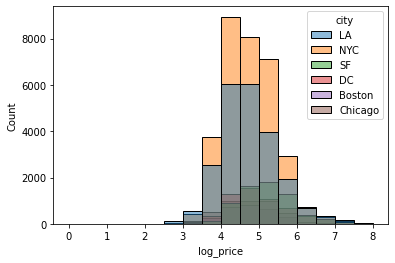

In [43]:
#visualize the data set
#train log_price
sns.histplot(data = dataset, x = "log_price", binwidth = .5, hue = "city")

0.9028677115420143


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


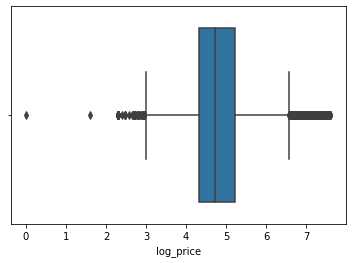

In [34]:
sns.boxplot(train['log_price'])

#using the IQR method to find the outliers is commonly used and more trusted.
Q1 = np.percentile(dataset['log_price'], 25, interpolation = 'midpoint')
Q3 = np.percentile(dataset['log_price'], 75, interpolation = 'midpoint')

IQR = Q3 - Q1
print(IQR)
#round up quartile if decimal: 0.90 = 1

In [ ]:
#Coding the linear regression class
class linearRegression():
  def __init__(self):    #creates new object when class is called
    #no instance is required
    pass

  def forward(self, X, y , W):
    """
    Parameters:
    X - independent
    y - dependent/target
    W - Wights

    Returns:
    loss - calculate sqaured erroe loss for y and y_pred
    y_pred - predicted target variable
    """

    
